<a href="https://colab.research.google.com/github/remre/striveschool/blob/main/lanelinedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

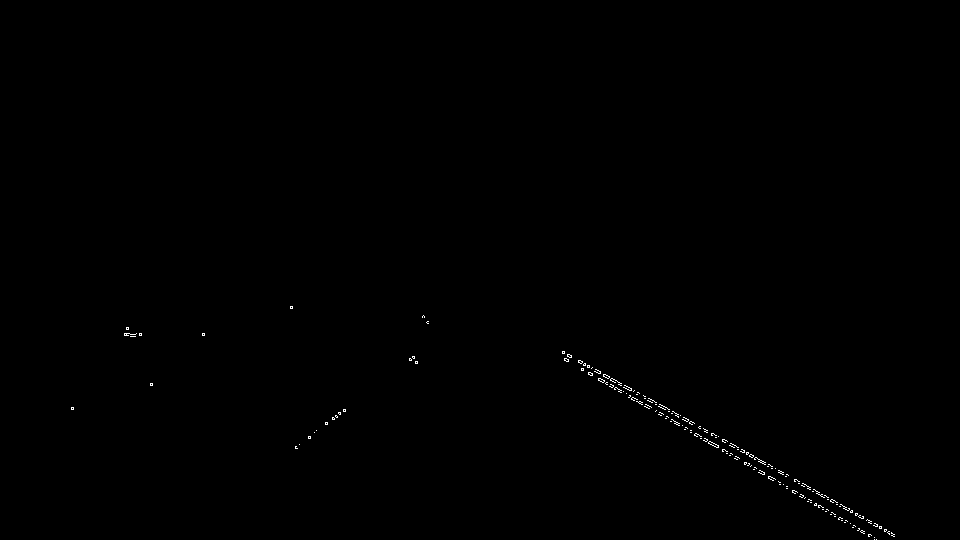

In [8]:
img = cv2.imread('solidWhiteCurve.jpg')
img1 = img.copy()
imgc = img1.copy()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)


gaussa= cv2.medianBlur(img1,5)
th2 = cv2.adaptiveThreshold(gaussa,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,19)

cannyadaptive = cv2.Canny(th2,109,200)
cv2_imshow(cannyadaptive)


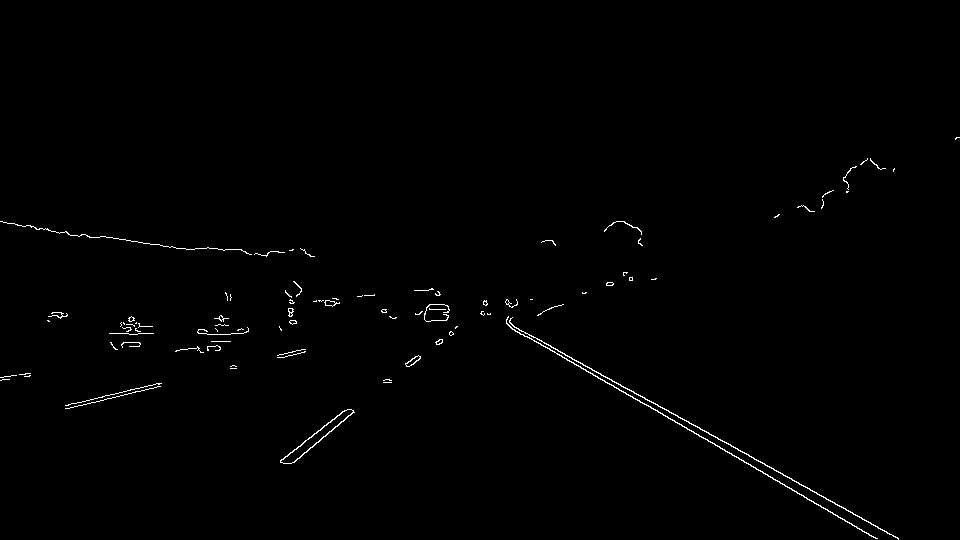

In [33]:


img = cv2.imread('solidWhiteCurve.jpg')
#cv2.imshow('ha',img)

img1 = img.copy()
imgc = img1.copy()
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)



gauss= cv2.GaussianBlur(img1,(3,3),1,1)

ret, thresh = cv2.threshold(gauss, 220,255, cv2.THRESH_BINARY +cv2.THRESH_TRUNC)


cannycoin = cv2.Canny(thresh,190,250)

cv2_imshow(cannycoin)


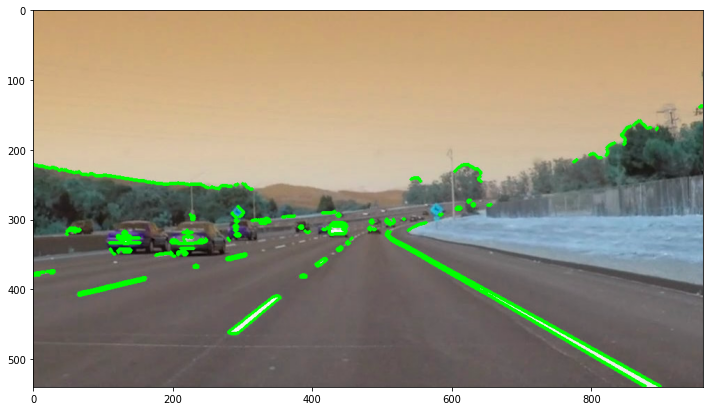

In [42]:
conturc, h = cv2.findContours(cannycoin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours simply curve joining all continuous points having same color or intenstity. 
contoursc = imgc.copy()
cv2.drawContours(contoursc, conturc, -1, (0,255,0), 3)
plt.figure(figsize = (12,10))
plt.imshow(contoursc)

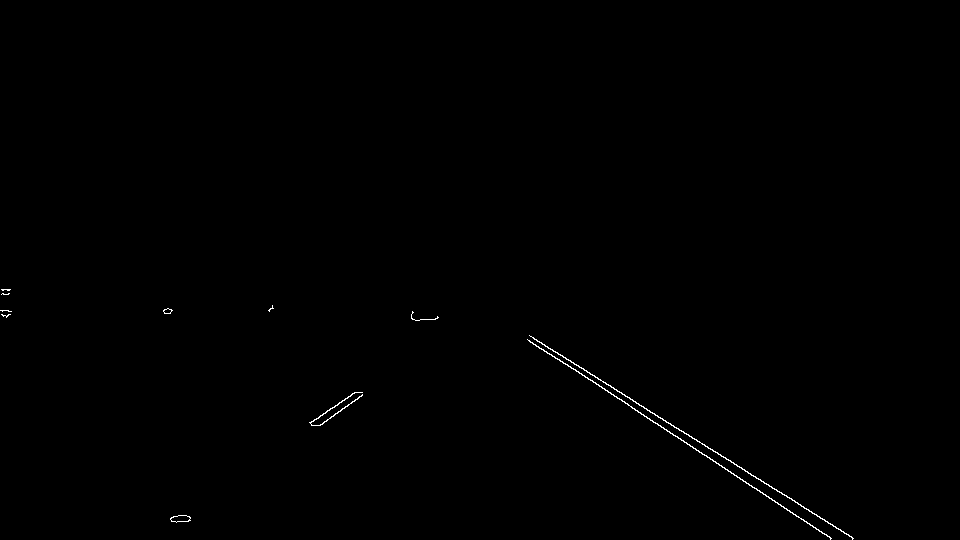

In [136]:


imgr = cv2.imread('solidWhiteRight.jpg')
#cv2.imshow('ha',img)

img1r = imgr.copy()
imgcr = imgr.copy()
img1r = cv2.cvtColor(img1r, cv2.COLOR_BGR2GRAY)



gaussr= cv2.GaussianBlur(img1r,(11,11),2,15)

retr, threshr = cv2.threshold(gaussr, 200,255, cv2.THRESH_BINARY +cv2.THRESH_TRUNC)


cannyr = cv2.Canny(threshr,150,220)

cv2_imshow(cannyr)

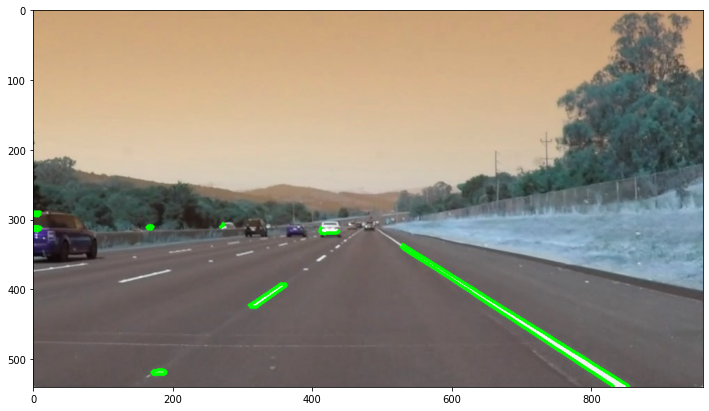

In [137]:
conturcr, h = cv2.findContours(cannyr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours simply curve joining all continuous points having same color or intenstity. 
contourscr = imgcr.copy()
cv2.drawContours(contourscr, conturcr, -1, (0,255,0), 3)
plt.figure(figsize = (12,10))
plt.imshow(contourscr)

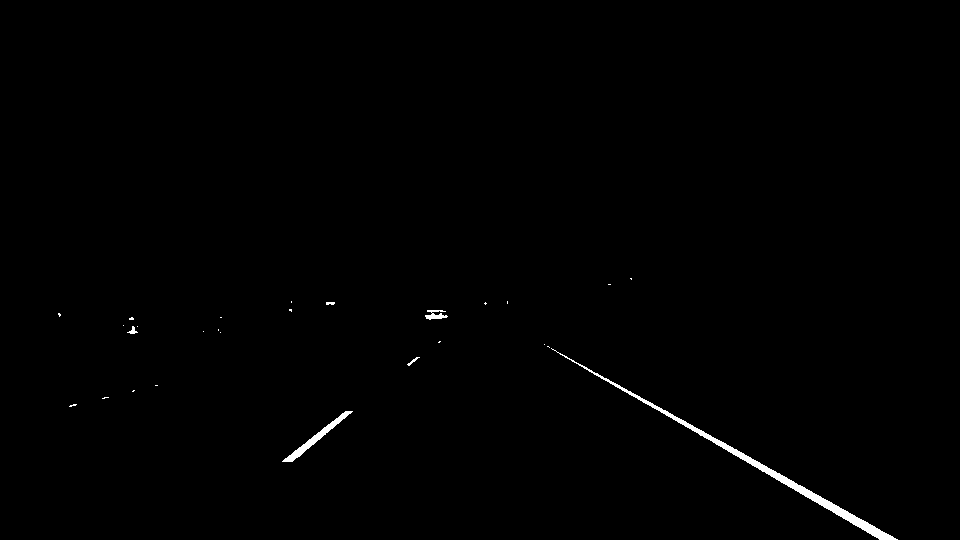

In [31]:
img1 = img.copy()
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
#img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
B, G, R = cv2.split(img1,[5])

lower = (0,0,220)  # for the coordinates check hsv_map image and h stands for X and s is Y axis  third one is stands for V 
upper = (180,38,255)


#upper = (150,180,200)
mask = cv2.inRange(img1,lower,upper)
cv2_imshow(mask)

In [32]:
B.size

518400

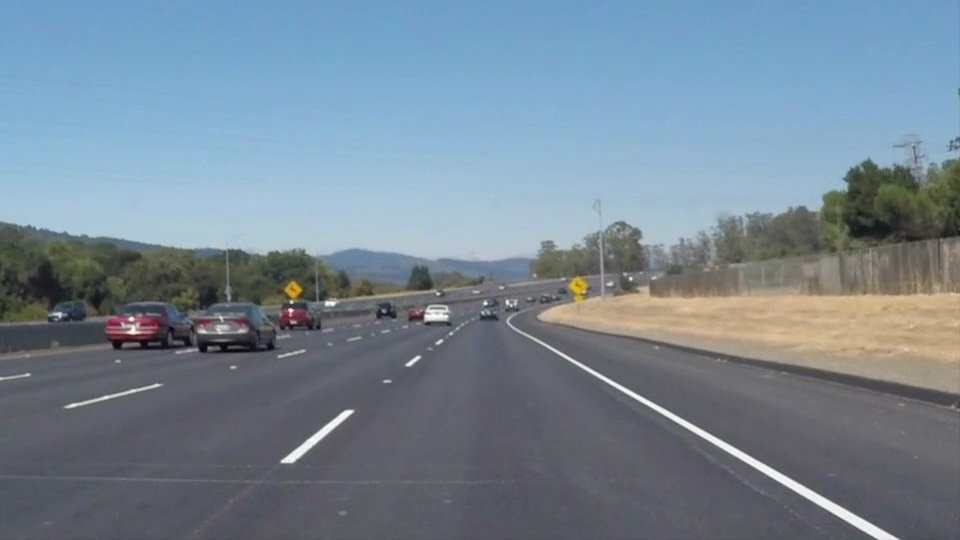

In [185]:
img = cv2.imread('solidWhiteCurve.jpg')
cv2_imshow(img)


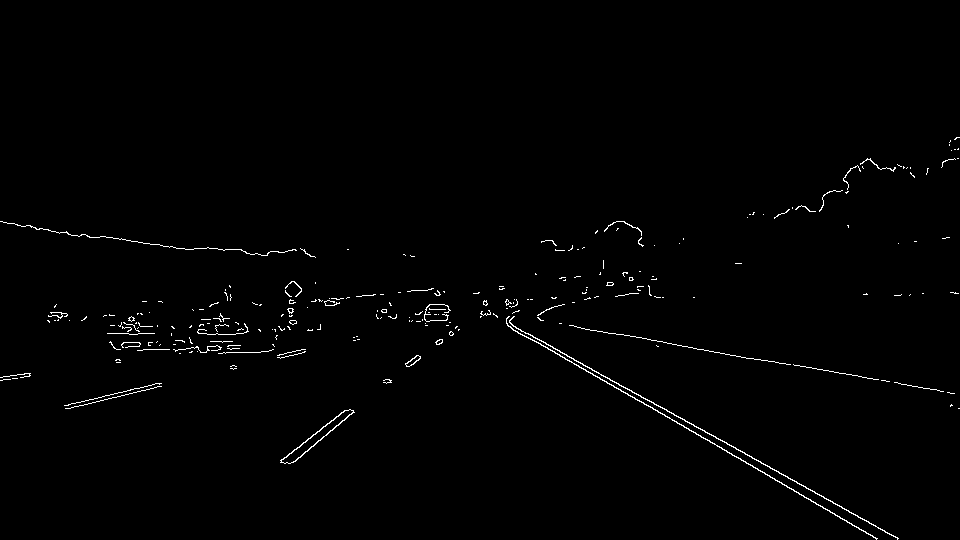

In [195]:
img1 = img.copy()
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
#cv2.Sobel(img1,)
cannyedge = cv2.Canny(gaussian, 150,155)
cv2_imshow(cannyedge)

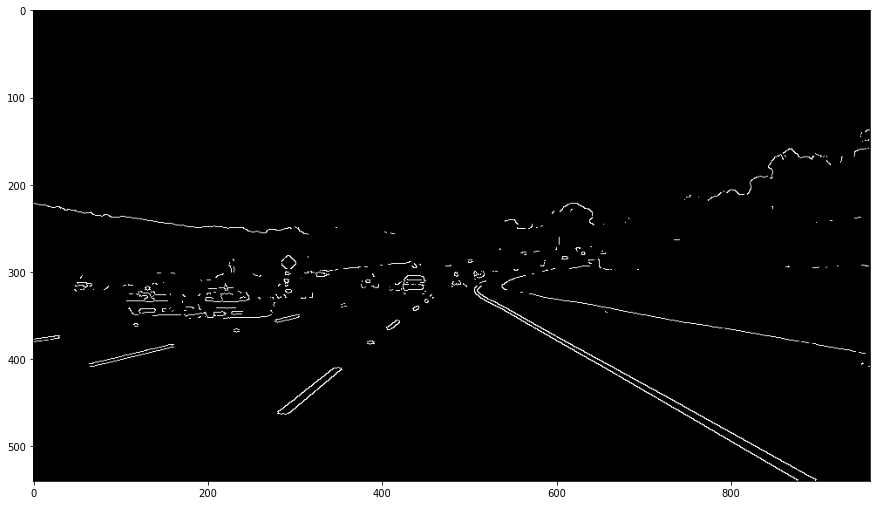

In [5]:
img = cv2.imread('solidWhiteCurve.jpg')

def cannyfunc(image):
  #copy the image and change it to Gray
  img1 = image.copy()
  img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
  #apply gaussian blur
  gaussian = cv2.GaussianBlur(img1,(5,5),0)
  #apply canny edge detection
  cannyedge = cv2.Canny(gaussian, 150,155)
  return cannyedge
plt.figure(figsize = (15,15))
plt.imshow(cannyfunc(img), cmap= 'gray')

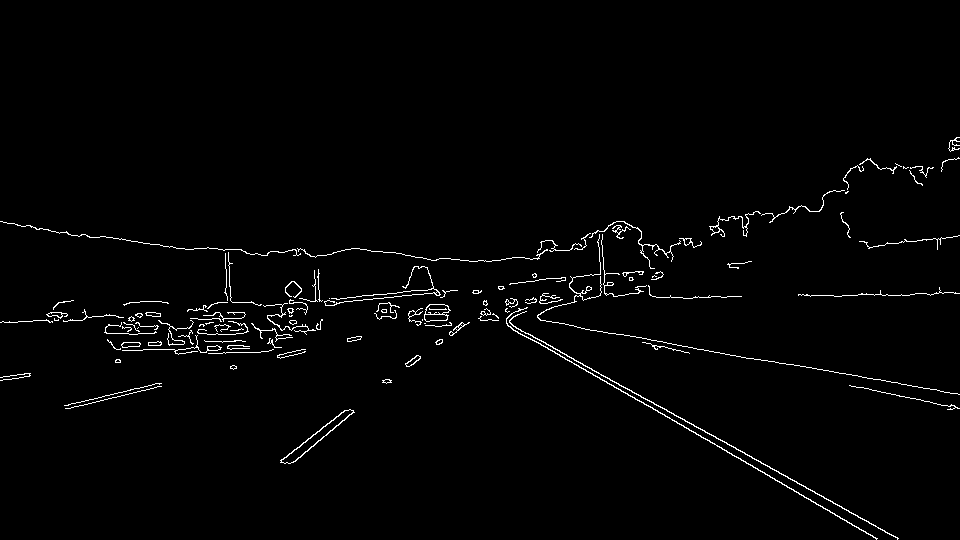

In [184]:
cv2_imshow(canny)

In [6]:
def roi(image):
  #we will enclose the triangle region
  height, weight = image.shape[0],image.shape[1]
  polygons = np.array([
                       [(140,height),(900,height),(500,300)]
                       ])#in order bottom left, bottom right, top point of the roi


  #mask the area whole black
  mask = np.zeros_like(image)
  

  #fill the polygon are fi
  cv2.fillPoly(mask, polygons,255)

  bitw = cv2.bitwise_and(mask,canny)

  
  return bitw

In [8]:
canny = cannyfunc(img)

In [10]:
roii = roi(canny)

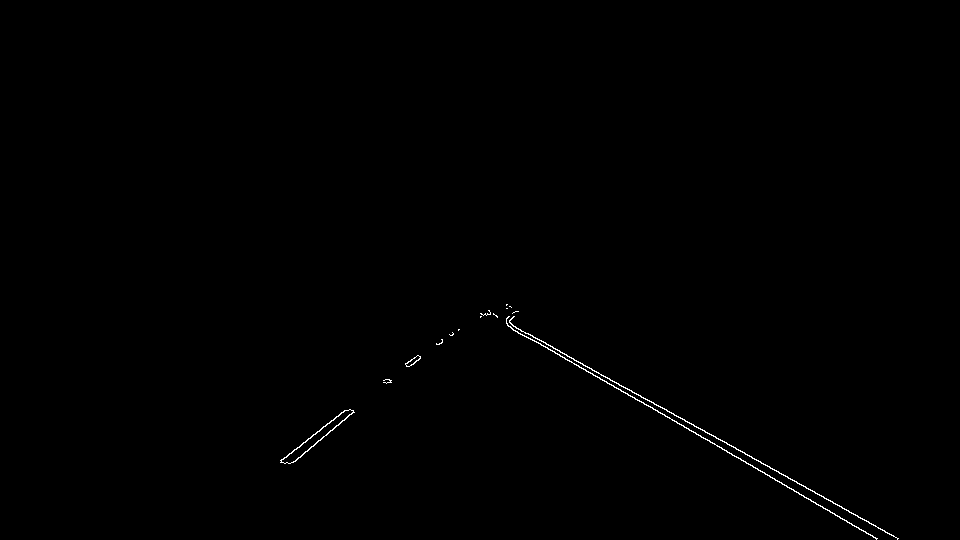

In [11]:
cv2_imshow(roii)

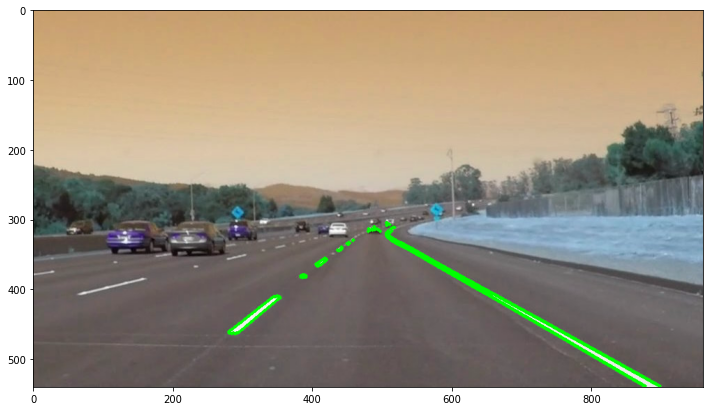

In [12]:
conturcr, h = cv2.findContours(roii, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours simply curve joining all continuous points having same color or intenstity. 
contourscr = img.copy()
cv2.drawContours(contourscr, conturcr, -1, (0,255,0), 3)
plt.figure(figsize = (12,10))
plt.imshow(contourscr)

In [40]:
#now specify the region of interest


def mcoordinates(image, line_parameters):
  slope, intercept = line_parameters
  y1 =  image.shape[0]
  y2 = int(y1*(3/5))
  x1 = (y1-intercept)/slope
  x2 = (y2-intercept)/slope
  return np.array([x1,y1,x2,y2])
def average_slope(image,lines):
  left_fit = []
  right_fit = []

  for line in lines:
    x1,y1,x2,y2 = line.reshape(4)
    parameter = np.polyfit((x1,x2),(y1,y2),1)
    slope = parameter[0]
    intercept = parameter[1]
    if slope < 0:
      left_fit.append((slope, intercept))
    else:
      right_fit.append((slope,intercept))
  left_fit_average = np.average(left_fit, axis =0)
  right_fit_average = np.average(right_fit, axis = 0)
  left_line = mcoordinates(image,left_fit_average)
  right_line = mcoordinates(image,right_fit_average)
  return np.array([left_line, right_line])

def display_lines(image,lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),5)
  return line_image

def roi(image):
  #we will enclose the triangle region
  height, weight = image.shape[0],image.shape[1]
  polygons = np.array([
                       [(140,height),(900,height),(500,300)]
                       ])#in order bottom left, bottom right, top point of the roi


  #mask the area whole black
  mask = np.zeros_like(image)
  

  #fill the polygon are fi
  cv2.fillPoly(mask, polygons,255)

  bitw = cv2.bitwise_and(mask,image)

  
  return bitw

img1 = img.copy()
roii = roi(canny)
lines = cv2.HoughLinesP(roii,2,np.pi/180, 120,np.array([]), minLineLength = 40, maxLineGap=5) #keep rho small but not too small theta in radiant


averaged_lines1,averaged_lines2 = average_slope(img1,lines)
averaged_lines  = averaged_lines1,averaged_lines2

lane_image = display_lines(img1,(averaged_lines))

combo = cv2.addWeighted(img1,0.7,lane_image,0.8,2)
cv2_imshow(lane_image)  


TypeError: ignored

In [41]:
k = [2.35443, 2.3434]
np.array([int(k), int(7.34)])

TypeError: ignored

In [34]:
np.round(4.23423423,0).astype('int')

4

In [36]:
int(4.234245345)

4

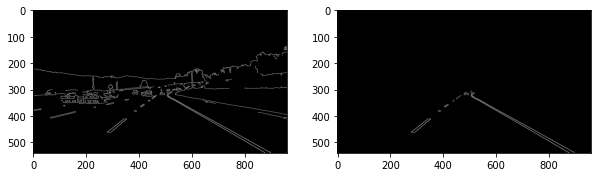

In [196]:
#fig,(ax1 , ax2) = plt.subplots(2)
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(canny, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(roi(canny), cmap='gray')